In [1]:
import os
import signal
import time

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from tqdm.auto import tqdm
from musicnet_dataset import MusicNet
from torch.utils.data import DataLoader

In [3]:
SIZE = 10_000

def worker_init(args):
    signal.signal(signal.SIGINT, signal.SIG_IGN) # ignore signals so parent can handle them
    np.random.seed(os.getpid() ^ int(time.time())) # approximately random seed for workers

kwargs = {'num_workers': 4, 'pin_memory': False, 'worker_init_fn': worker_init}

with MusicNet("../data", train=True, download=False, window=8192, epoch_size=SIZE, pitch_shift=64) as dataset:
    dataloader = DataLoader(dataset, batch_size=1, drop_last=True, **kwargs)
    counts = np.zeros(128)
    for inputs, targets in tqdm(dataloader, total=SIZE):
        counts += targets.numpy()[0, 8192 // 2, :]

  0%|          | 0/10000 [00:00<?, ?it/s]

<BarContainer object of 128 artists>

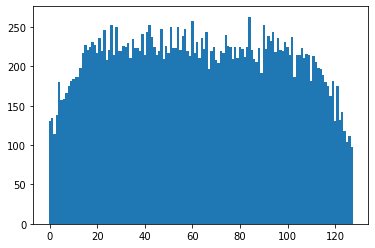

In [4]:
plt.bar(np.arange(len(counts)), counts, width=1)